# **COMP SCI 216 Project**
#### Lynn Fan, Eric Young, Annie Lin, Leona Lu
#####  *Data Source:* [2021 World Happiness Report](https://worldhappiness.report/ed/2021/)

In [ ]:
# install packages 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# load data
raw = pd.read_csv("https://github.com/leona-lu/216_Project/raw/main/RAW.csv")
Unemployment = pd.read_csv("https://github.com/leona-lu/216_Project/raw/main/Unemployment_data.csv")
Freedom_2019 = pd.read_csv("https://github.com/leona-lu/216_Project/raw/main/Human%20_Freedom_Index/hfi_cc_2019.csv")
Freedom_2018 = pd.read_csv("https://github.com/leona-lu/216_Project/raw/main/Human%20_Freedom_Index/hfi_cc_2018.csv")
Freedom_2020 = pd.read_csv("https://github.com/leona-lu/216_Project/raw/main/Human%20_Freedom_Index/hfi_cc_2020.csv")
Region = pd.read_csv("https://github.com/lukes/ISO-3166-Countries-with-Regional-Codes/raw/master/all/all.csv")
Region = Region.rename(columns = {"name":"Country name"})

In [ ]:
Freedom_2019.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,5.3,9.1,10,10,10,10,10,10,10,-,-,7.5,8.8,9.3,10,10,10,10,-,-,10,9.6,8,9.2,10,10,-,-,10,-,...,5.1,9.3,9.7,9.6,10,9.6,9.6,9.3,8.1,9,6,9.4,7.7,10,6.3,5.4,8.3,6.7,8.3,10,9.1,10,9.7,5.6,5.4,6.4,8,6.3,10,6.9,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,3.8,9.5,10,9.5,5,9.9,9.9,8.9,10,-,-,0,5,7.8,10,5,2.5,5.8,-,-,5,6.9,3,4.9,5,5,-,-,5,-,...,4.7,7,8.5,8.9,5,7.3,8.5,6.2,5.9,6.9,4.8,0.5,2.6,0,3.7,0,1.1,1.6,2.8,0,5.3,10,5.1,5.6,4.1,6,6,7.8,3,5.4,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,3.4,8.1,10,9.7,7.5,9.9,7.2,8.9,10,-,-,5,7.5,8.1,5,5,10,6.7,-,-,10,8.9,7.5,8.8,2.5,2.5,-,-,2.5,-,...,3,9.4,4.2,3.7,5,5.6,9.2,7.7,4.3,7.1,4.9,2.5,3.7,0,2.9,3.1,0.1,2,3.2,5,9.2,6,6.7,10,4.4,7.2,4,6.6,0,5.4,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,5.7,8,5,10,7.5,10,10,8.5,10,-,-,10,10,8.8,10,10,10,10,-,-,7.5,9,6.9,7.8,7.5,10,-,-,5,-,...,4,5,6,4.9,10,6.5,6.7,7.3,5.9,6.6,4.6,5.2,4.9,10,5.4,0.8,8,4.7,6.5,5,4.3,9,6.1,2.8,2.2,3.3,10,2.5,10,5.1,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,4.9,9,10,10,7.5,10,10,9.5,10,-,-,7.5,8.8,9.1,10,5,10,8.3,-,-,5,8.6,5.1,6.2,7.5,7.5,-,-,5,-,...,5.9,8.6,9.5,9.8,10,9.5,9,8.8,8.1,8.6,5.7,9,7.4,10,5.1,5.4,10,6.8,8.2,10,7.8,10,9.3,6.7,5.7,6.8,10,9.3,0,6.4,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27


In [ ]:
# Merge data
## 1. Merge happiness data with Region 
raw = pd.merge(raw, Region[['Country name', 'region']], on = "Country name", how = "inner")
raw.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Asia
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Asia
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Asia
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Asia
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Asia


In [ ]:
## 2. Merge Freedom report data 
Freedom_2020_small = Freedom_2020.loc[:,['year','countries','hf_score']]
Combined = pd.merge(raw, Freedom_2020_small,  how='left', left_on=['Country name','year'], right_on = ['countries','year'])
Combined = Combined.dropna()
Combined.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region,countries,hf_score
13,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279,Europe,Albania,7.72
14,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300,Europe,Albania,7.75
15,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257,Europe,Albania,7.63
16,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271,Europe,Albania,7.54
17,Albania,2013,4.551,9.359,0.759,67.24,0.632,-0.127,0.863,0.634,0.338,Europe,Albania,7.52


# **Variable Definitions**

---



* **`Country name`**: name of the country 
* **`Life Ladder`**: Happiness score or measurement of subjective well-being. Question is phrased as 
> *Please imagine a ladder, with steps numbered from 0 at the bottom to 10 at the top. The top of the ladder represents the best possible life
for you and the bottom of the ladder represents the worst possible life for you On which step of the ladder would you say you personally feel you stand at this time?* 

* **`Log GDP per Capita`**: purchasing power parity(PPP) at constant 2017 international dollar prices

* **`Social Support`**: the national average of the binary responses to the  question:
> *If you were in trouble, do you have relatives or friends you can count on to help you whenever you need them, or not*

* **`Healthy life expectancy at birth`**: Average number of years that a person can expect to live in "full health" by taking into account years lived in less than full health due to disease and/or injury.


* **`Freedom to make life choices`**:  the national average of the binary responses to the  question:
> *Are you satisfied or dissatisfied with your freedom to choose what
you do with your life?*

* **`Generosity`**:	residual of regressing national average of response to the questionon on GDP per capita	
> *Have you donated money to a charity in the past month?*

* **`Perceptions of corruption`**: The measure is the national average of the survey responses to two questions	
> * *Is corruption widespread throughout
the government or not*
> * *Is corruption widespread within businesses or
not?*

* **`Positive affect`**: average of three positive affect measures in
GWP: happiness, laugh and enjoyment

* **`Negative affect`**: average of three negative affect measures in
GWP: worry, sadness and anger

* **`Region`**: Region where the country is located in 


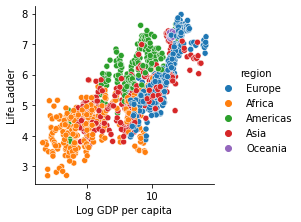

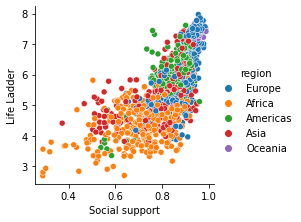

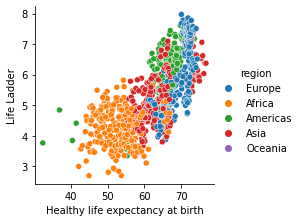

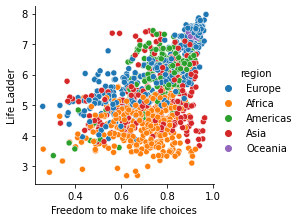

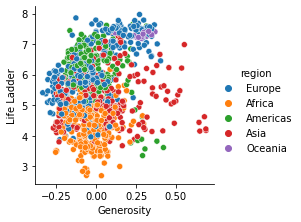

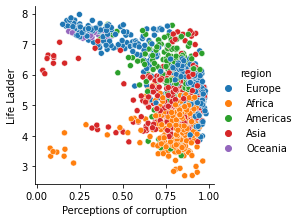

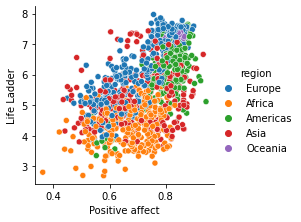

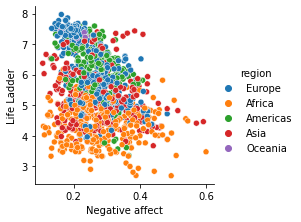

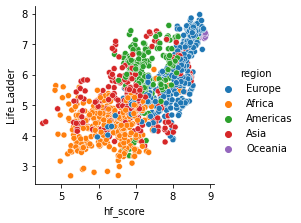

In [ ]:
# Run but do not modify this code
sns.relplot(data=Combined, x="Log GDP per capita", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="Social support", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="Healthy life expectancy at birth", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="Freedom to make life choices", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="Generosity", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="Perceptions of corruption", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="Positive affect", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="Negative affect", y="Life Ladder", height=3, hue='region')
sns.relplot(data=Combined, x="hf_score", y="Life Ladder", height=3, hue='region')


In [ ]:
#testing multicollinearity between those variables
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
X = Combined.loc[:,['Log GDP per capita',	'Social support',	'Healthy life expectancy at birth',	'Freedom to make life choices',	'Generosity',	'Perceptions of corruption',	'hf_score']]
calc_vif(X)

,variables,VIF
0,Log GDP per capita,376.941248
1,Social support,104.364910
2,Healthy life expectancy at birth,298.922636
3,Freedom to make life choices,38.531594
4,Generosity,1.208316
5,Perceptions of corruption,11.286572
6,hf_score,146.905392


In [ ]:
#fixing multicollinearity
Y = X.drop(['Healthy life expectancy at birth','hf_score'],axis=1)
calc_vif(Y)

,variables,VIF
0,Log GDP per capita,109.251525
1,Social support,103.346769
2,Freedom to make life choices,35.637514
3,Generosity,1.206848
4,Perceptions of corruption,10.926971


In [ ]:
#Q1 from Lynn
#Linear Regression to start with
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
X = Combined[['Log GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption']]
y = Combined["Life Ladder"]
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X, y)
selector.support_
#exclude Healthy life expectancy at birth

array([ True,  True,  True,  True,  True])

In [ ]:
linreg = LinearRegression()
X = Combined[['Log GDP per capita','Social support','Freedom to make life choices','Generosity','Perceptions of corruption']]
linreg.fit(X, y)
linreg.coef_
pd.DataFrame(linreg.coef_, 
             X.columns, 
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

,coef
Social support,2.018753
Freedom to make life choices,1.002960
Generosity,0.904757
Log GDP per capita,0.536794
Perceptions of corruption,-0.723674


In [ ]:
mean_squared_error(y, linreg.predict(X))
r2_score(y, linreg.predict(X))

0.7309500290411792

## Q3: Is there any country experiencing significant increase/decrease in happiness score over the duration of the Report, and which parameters are the most significant in affecting the changes?

In this part, we
1. grouped columns by year and region:

a) visualized, with line plot, change in Life Ladder in different regions from 2008 to 2018 ($\Delta LL$);

b) visualized, with bar chart, standard deviation of Life Ladder in different regions from 2008 to 2018 ($\sigma _{rLL}$);
2. grouped columns by year and country:

a) calculated standard deviation of Life Ladder in each country from 2008 to 2018 ($\sigma _{cLL}$), and sorted it in both ascending and descending order; 

b) calculated standard deviation of each parameter in each country from 2008 to 2018 ($\sigma _{c\_params}$); 

c) visualized, with histogram, $\sigma _{cLL}$ in each country from 2008 to 2018;
3. continued 2:

a) respectively analyzed countries with 1. largest $\sigma _{cLL}$ (group A) 2. smallest $\sigma _{cLL}$ (group B) 3. sharing the most common range of $\sigma _{cLL}$ (group C);

b) in each group, calculated the mean of $\sigma _{c\_params}$, and visualized the weight of each parameter with pie chart;

c) compared result among group A, B, and C.

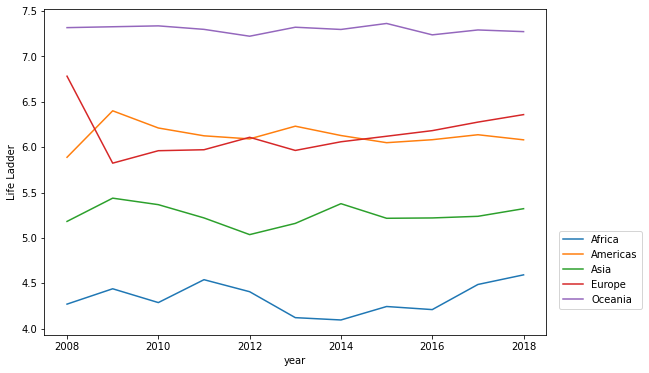

In [ ]:
## Visualzation of change in Happiness Score in different regions 
Year_data = Combined.groupby(["year","region"]).agg({"Life Ladder": "mean"}) 
g = sns.lineplot(data= Year_data, x="year", y="Life Ladder", hue = "region")
box = g.get_position()
g.set_position([box.x0, box.y0, box.width * 1.5, box.height * 1.5]) # resize position

# Put a legend to the right side
g.legend(loc='center right', bbox_to_anchor=(1.2, 0.2), ncol=1)

Based on the graph, Oceania has the highest average life ladder. Before 2015, Europe has the second highest average life ladder and Americas has the third highest, but Europe's average life ladder exceeds that of Americas afterwards. Asia has the fourth  highest average life ladder. Africa has the lowest. 

* There's drastic change in hapiness score between 2008 and 2009 in Europe and Americas. 
* ... 



In [ ]:
# Calculate standard deviation of Life Ladder in each region for each year. 
Combined=Combined.dropna()
std=Combined.groupby(['year','region'], as_index=False).agg({"Life Ladder": "std"}) 
std.head()

,year,region,Life Ladder
0,2008,Africa,0.706175
1,2008,Americas,0.906220
2,2008,Asia,0.848205
3,2008,Europe,0.970913
4,2008,Oceania,0.089803


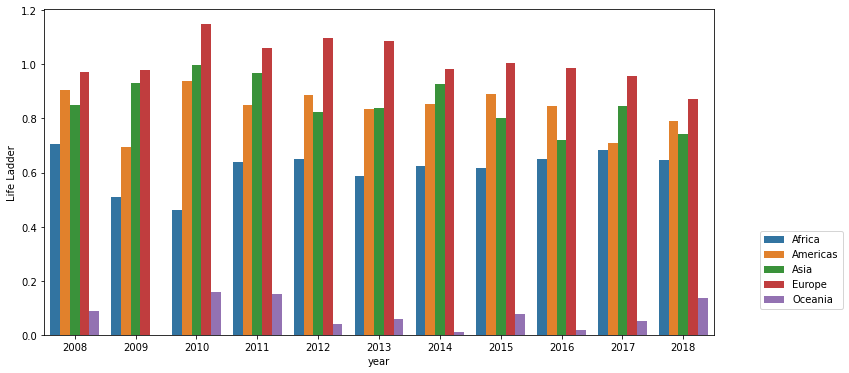

In [ ]:
# Standard Deviation 
std_graph=sns.barplot(x= "year", y="Life Ladder", hue = "region", data=std)
box=std_graph.get_position()
std_graph.set_position([box.x0, box.y0, box.width*2, box.height * 1.5]) # resize position
# Put a legend to the right side
std_graph.legend(loc='center right',bbox_to_anchor=(1.2, 0.2),ncol=1)

In [ ]:
#2. a) standard deviation of Life Ladder in every country throughout the time period
#we use standard deviation to measure magnitude of change of Life Ladder in every country throughout the time period
#countries with largest standard deviation of Life Ladder
LL_std_desc=Combined.groupby('Country name',as_index=False).agg({'Life Ladder':'std'}).sort_values(by='Life Ladder', ascending=False)
LL_std_desc.head()

,Country name,Life Ladder
13,Benin,0.840790
2,Angola,0.815286
65,Liberia,0.789411
45,Guinea,0.779655
16,Botswana,0.674009


In [ ]:
#countries with smallest standard deviation of Life Ladder
LL_std_asc=Combined.groupby('Country name',as_index=False).agg({'Life Ladder':'std'}).sort_values(by='Life Ladder')
LL_std_asc.head()

,Country name,Life Ladder
85,New Zealand,0.076092
5,Australia,0.088326
90,Norway,0.090442
84,Netherlands,0.099135
11,Belgium,0.105270


In [ ]:
#2 b)
params_std_asc=Combined.groupby('Country name',as_index=False).agg({'Log GDP per capita':'std',
                                                                    'Social support':'std',
                                                                    'Healthy life expectancy at birth':'std',
                                                                    'Freedom to make life choices':'std',
                                                                    'Generosity':'std',
                                                                    'Perceptions of corruption':'std',
                                                                    'Positive affect':'std',
                                                                    'Negative affect':'std',
                                                                    })
params_std_asc.head()

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Albania,0.078745,0.073954,0.851926,0.109475,0.078026,0.050528,0.032592,0.031970
1,Algeria,0.027839,0.017462,0.620860,0.069844,0.014844,0.049608,0.037942,0.029848
2,Angola,0.031059,0.018209,0.903696,0.091398,0.099010,0.048808,0.052666,0.031117
3,Argentina,0.037350,0.014942,0.588576,0.077505,0.029306,0.034013,0.017822,0.039537
4,Armenia,0.105293,0.040817,0.625285,0.106959,0.026394,0.067323,0.045207,0.024787


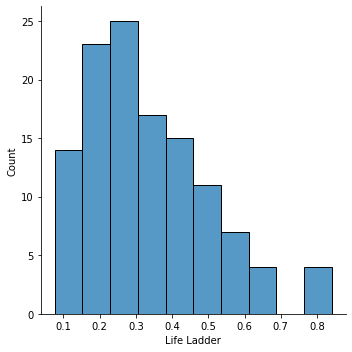

In [ ]:
#c
start=LL_std_asc.iloc[0,1]
end=LL_std_desc.iloc[0,1]
bin_width=(end-start)/10
bin_list=[start+i*bin_width for i in range(11)]
data=LL_std_asc['Life Ladder'].dropna()

hist=sns.displot(data=LL_std_asc,bins=bin_list,x='Life Ladder')

#To-do: for each group, color the column being analyzed in a different color

In [ ]:
#c) this part will focus on the following 4 countries with the most significant standard deviation 
#group A
bound=start+9*bin_width
group_a=LL_std_asc[LL_std_asc['Life Ladder']>bound]
group_a

,Country name,Life Ladder
45,Guinea,0.779655
65,Liberia,0.789411
2,Angola,0.815286
13,Benin,0.840790


In [ ]:
filter=params_std_asc['Country name'].isin(group_a['Country name'])
params_group_a=params_std_asc[filter]
params_group_a

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
2,Angola,0.031059,0.018209,0.903696,0.091398,0.099010,0.048808,0.052666,0.031117
13,Benin,0.052020,0.057367,1.041687,0.030422,0.048802,0.040197,0.038545,0.107336
45,Guinea,0.087262,0.040332,1.503423,0.029330,0.056797,0.039646,0.051944,0.061353
65,Liberia,0.033667,0.039214,1.151034,0.074581,0.045481,0.018649,0.073765,0.049176


In [ ]:
params_mean_group_a=params_group_a.mean().sort_values(ascending=False)
params_mean_group_a

Healthy life expectancy at birth    1.149960
Generosity                          0.062522
Negative affect                     0.062245
Freedom to make life choices        0.056433
Positive affect                     0.054230
Log GDP per capita                  0.051002
Social support                      0.038781
Perceptions of corruption           0.036825
dtype: float64

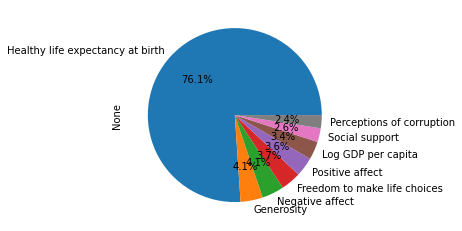

In [ ]:
params_mean_group_a.plot.pie(autopct="%.1f%%");

Among all these 4 countries, Healthy life expectancy at birth has a significantly larger standard deviation than that of other parameters, meaning it changed the most in the given time period. This leads to the conclusion that Healthy life expectancy at birth is the most important in affecting change in Life Ladder in countries with the lowest Life Ladder.

In [ ]:
#group B
bound=start+bin_width
group_b=LL_std_asc[LL_std_asc['Life Ladder']<bound]
group_b.head()

,Country name,Life Ladder
85,New Zealand,0.076092
5,Australia,0.088326
90,Norway,0.090442
84,Netherlands,0.099135
11,Belgium,0.105270


In [ ]:
filter=params_std_asc['Country name'].isin(group_b['Country name'])
params_group_b=params_std_asc[filter]
params_group_b.head()

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
5,Australia,0.032036,0.012587,0.522320,0.010491,0.061955,0.030266,0.024624,0.021281
11,Belgium,0.023326,0.016459,0.474955,0.029286,0.056142,0.099751,0.026949,0.012656
23,Canada,0.031327,0.011613,0.570951,0.013871,0.058919,0.033083,0.022674,0.023327
31,Denmark,0.034847,0.009093,0.770558,0.013027,0.083371,0.029485,0.037687,0.026134
36,Ethiopia,0.117993,0.060954,1.005982,0.038768,0.046197,0.080297,0.051998,0.036373


In [ ]:
params_mean_group_b=params_group_b.mean().sort_values(ascending=False)
params_mean_group_b

Healthy life expectancy at birth    0.487010
Generosity                          0.057280
Perceptions of corruption           0.056166
Log GDP per capita                  0.044054
Positive affect                     0.025848
Freedom to make life choices        0.025685
Negative affect                     0.021668
Social support                      0.017976
dtype: float64

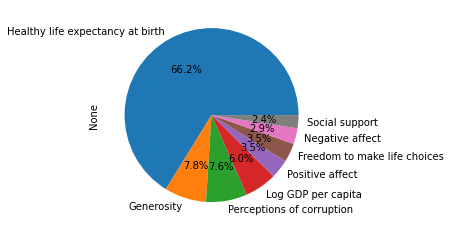

In [ ]:
params_mean_group_b=params_mean_group_b*10 
params_mean_group_b.plot.pie(autopct="%.1f%%");

In [ ]:
#group C
l_bound=start+2*bin_width
h_bound=start+3*bin_width
temp=LL_std_asc[LL_std_asc['Life Ladder']>l_bound]
group_c=temp[temp['Life Ladder']<h_bound]
group_c.head()

,Country name,Life Ladder
38,France,0.229625
93,Paraguay,0.229815
1,Algeria,0.232318
80,Mozambique,0.247990
4,Armenia,0.248054


In [ ]:
filter=params_std_asc['Country name'].isin(group_c['Country name'])
params_group_c=params_std_asc[filter]
params_group_c.head()

,Country name,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1,Algeria,0.027839,0.017462,0.620860,0.069844,0.014844,0.049608,0.037942,0.029848
4,Armenia,0.105293,0.040817,0.625285,0.106959,0.026394,0.067323,0.045207,0.024787
9,Bangladesh,0.178285,0.079348,1.529853,0.115451,0.031608,0.050206,0.064269,0.049085
21,Cambodia,0.129421,0.051730,0.941939,0.012739,0.118600,0.039999,0.020962,0.052962
26,Chile,0.074774,0.026140,0.400699,0.051881,0.082826,0.048783,0.033571,0.020320


In [ ]:
params_mean_group_c=params_group_c.mean().sort_values(ascending=False)
params_mean_group_c

Healthy life expectancy at birth    0.900618
Log GDP per capita                  0.080973
Freedom to make life choices        0.070341
Generosity                          0.069399
Perceptions of corruption           0.047940
Positive affect                     0.043974
Negative affect                     0.038277
Social support                      0.037975
dtype: float64

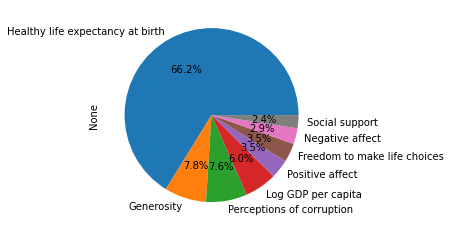

In [ ]:
params_mean_group_b=params_mean_group_b*10 
params_mean_group_b.plot.pie(autopct="%.1f%%");

In [ ]:
Combined.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,region,countries,hf_score
13,Albania,2009,5.485,9.262,0.833,66.20,0.525,-0.158,0.864,0.640,0.279,Europe,Albania,7.72
14,Albania,2010,5.269,9.303,0.733,66.40,0.569,-0.172,0.726,0.648,0.300,Europe,Albania,7.75
15,Albania,2011,5.867,9.331,0.759,66.68,0.487,-0.205,0.877,0.628,0.257,Europe,Albania,7.63
16,Albania,2012,5.510,9.347,0.785,66.96,0.602,-0.169,0.848,0.607,0.271,Europe,Albania,7.54
17,Albania,2013,4.551,9.359,0.759,67.24,0.632,-0.127,0.863,0.634,0.338,Europe,Albania,7.52


In [ ]:
# Define x and y
def linear(year, raw):
  data =  raw[raw["year"] == year].drop(columns=['Country name', 'region', 'countries']).values
  target = raw[raw["year"] == year]["Life Ladder"].values
  linear_model = LinearRegression()
  model = linear_model.fit(X = data, y = target)
  print('intercept is', model.intercept_)
  print('slope is', model.coef_)

In [ ]:
# Linear Regression:
linear(2018, Combined)

intercept is -2.1316282072803006e-14
slope is [ 0.00000000e+00  1.00000000e+00  2.77555756e-17  1.11716192e-15
  5.55111512e-16 -1.21083699e-15 -1.03216047e-15 -1.97758476e-15
 -1.41770276e-15  1.82406173e-15 -2.77555756e-17]


In [ ]:
linear(2008, Combined)

intercept is 0.0
slope is [ 0.00000000e+00  1.00000000e+00  4.44089210e-16 -2.37310172e-15
  0.00000000e+00 -1.46779290e-15  1.10328413e-15  9.22872889e-16
 -1.28369537e-16  1.15359111e-15 -9.80118764e-17]


In [ ]:
linear(2009, Combined)

intercept is -1.5987211554602254e-14
slope is [ 0.00000000e+00  1.00000000e+00  6.93889390e-17 -1.82232701e-15
  3.33066907e-16  6.80011603e-16 -1.38777878e-16 -2.49800181e-16
 -6.97358837e-16  2.51534904e-16  2.77555756e-17]
